In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
dataset =pd.read_excel('RTA.xlsx')
dataset=dataset['Accidents']
dataset=np.array(dataset).reshape(-1,1)
dataset

array([[ 4],
       [ 4],
       [ 6],
       [ 5],
       [ 9],
       [ 3],
       [11],
       [ 6],
       [ 1],
       [10],
       [ 2],
       [ 7],
       [ 6],
       [ 7],
       [ 4],
       [10],
       [ 5],
       [ 4],
       [ 6],
       [ 6],
       [ 8],
       [ 7],
       [ 3],
       [ 5],
       [ 2],
       [ 5],
       [11],
       [ 7],
       [ 5],
       [ 5],
       [ 7],
       [ 8],
       [ 4],
       [ 2],
       [ 9],
       [ 1],
       [ 3],
       [10],
       [ 4],
       [ 6],
       [ 8],
       [ 7],
       [ 8],
       [ 7],
       [ 4],
       [ 7],
       [ 3],
       [ 8],
       [ 3],
       [ 6],
       [ 5],
       [ 5],
       [ 4],
       [11],
       [ 8],
       [ 8],
       [ 2],
       [ 6],
       [ 8],
       [ 5],
       [ 6],
       [ 5],
       [ 5],
       [ 5],
       [11],
       [10],
       [ 4],
       [ 4],
       [ 8],
       [ 9],
       [ 4],
       [ 3],
       [ 5],
       [ 8],
       [ 5],
       [ 8],
       [ 1],

In [4]:
# normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min()

0.0

In [5]:
# split into train and test sets
train_size = 360
test_size=181

In [6]:
train=dataset[0:train_size, :]
train.shape

(360, 1)

In [7]:
test=dataset[train_size:541, :]
test.shape

(180, 1)

In [8]:
# convert an array of values into a dataset matrix
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
x_train,y_train = get_data(train, look_back)

In [10]:
x_test,y_test=get_data(test, look_back)

In [11]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(x_train, y_train, epochs=100,batch_size=180)

Epoch 1/100
358/358 [==============================] - 2s 6ms/step - loss: 0.0649
Epoch 2/100
358/358 [==============================] - 0s 41us/step - loss: 0.0633
Epoch 3/100
358/358 [==============================] - 0s 59us/step - loss: 0.0618
Epoch 4/100
358/358 [==============================] - 0s 45us/step - loss: 0.0602
Epoch 5/100
358/358 [==============================] - 0s 40us/step - loss: 0.0587
Epoch 6/100
358/358 [==============================] - 0s 31us/step - loss: 0.0572
Epoch 7/100
358/358 [==============================] - 0s 31us/step - loss: 0.0557
Epoch 8/100
358/358 [==============================] - 0s 33us/step - loss: 0.0542
Epoch 9/100
358/358 [==============================] - 0s 30us/step - loss: 0.0528
Epoch 10/100
358/358 [==============================] - 0s 35us/step - loss: 0.0514
Epoch 11/100
358/358 [==============================] - 0s 34us/step - loss: 0.0500
Epoch 12/100
358/358 [==============================] - 0s 49us/step - loss: 0.0486
Ep

358/358 [==============================] - 0s 30us/step - loss: 0.0176
Epoch 98/100
358/358 [==============================] - 0s 32us/step - loss: 0.0176
Epoch 99/100
358/358 [==============================] - 0s 41us/step - loss: 0.0176
Epoch 100/100
358/358 [==============================] - 0s 40us/step - loss: 0.0176


In [14]:
# make predictions
y_pred=model.predict(x_test)

In [15]:
 # invert predictions
y_pred=scaler.inverse_transform(y_pred)

In [16]:
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

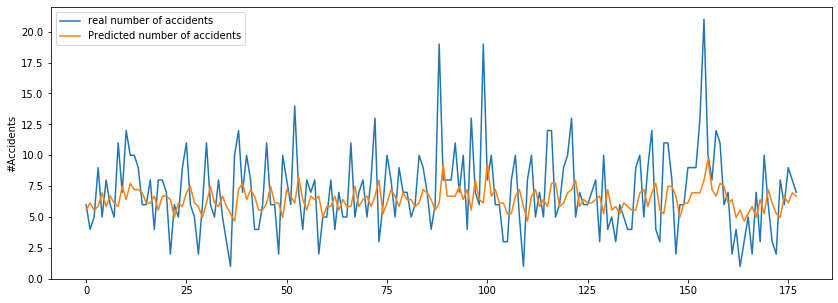

In [17]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real number of accidents')
plt.plot(y_pred,label='Predicted number of accidents')
plt.ylabel('#Accidents')
plt.legend()
plt.show()